In [2]:
#!python

from numpy import cos, sin, pi, absolute, arange
import numpy as np
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


import sounddevice as sd
import time



Base freq:  3
Second freq:  450.0
Third freq:  250.0


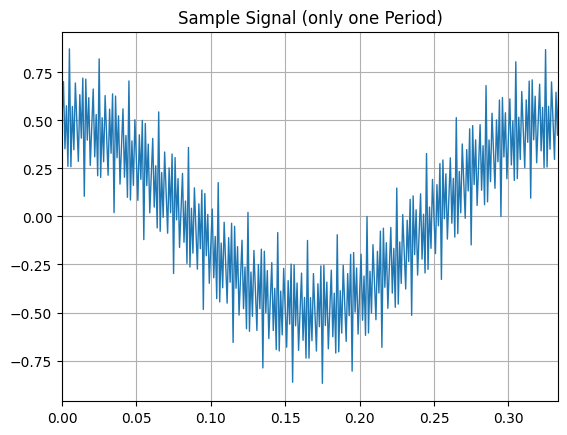

In [36]:
wave_duration = 100
sample_rate = 1000 
nyq_rate = sample_rate / 2.0

samples = wave_duration*sample_rate



t = np.linspace(0, wave_duration, samples, endpoint=False)

attenuation = 0.5
base_freq = 3

f1 = base_freq
w1 = 2*pi*f1
print("Base freq: ", base_freq)
f2 = nyq_rate*0.9
w2 = 2*pi*f2
print("Second freq: ", f2)
f3 = nyq_rate*0.5
w3 = 2*pi*f3
print("Third freq: ", f3)


x = attenuation*cos(w1*t) + attenuation*0.5*sin(w2*t) +  attenuation* 0.25*sin(w3*t)

figure(1)
plot(t, x, linewidth=1)
title('Sample Signal (only one Period)')
xlim(0, 1/base_freq)
grid(True)


In [20]:
x  = (x*32768).astype(np.int16)  # scale to int16 for sound card

In [21]:
# Play the waveform out the speakers
sd.play(attenuation*x, sample_rate)
time.sleep(wave_duration)
sd.stop()